Zadanie 1.

In [1]:
import math


def forwardPass(wiek, waga, wzrost): 
    hidden1 = wiek * -0.46122 + waga * 0.97314 + wzrost * -0.39203 + 0.80109
    hidden1_po_aktywacji = 1 / (1 + math.exp(-hidden1))
    hidden2 = wiek * 0.78548 + waga * 2.10684 + wzrost * -0.57847 + 0.43529
    hidden2_po_aktywacji = 1 / (1 + math.exp(-hidden2))
    output =  hidden1_po_aktywacji * -0.81546 + hidden2_po_aktywacji * 1.03775 - 0.2368
    return output

print(forwardPass(23, 75, 176))
print(forwardPass(25, 67, 180))

0.7985341880063129
0.8009499165011525


Zadanie 2.

In [2]:
import sklearn
from sklearn import datasets
import pandas as pd

iris_dataset = datasets.load_iris()
iris_dataset



{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
from sklearn.model_selection import train_test_split


train_data, test_data, train_labels, test_labels = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.3)

In [4]:
from sklearn.neural_network import MLPClassifier


clf2 = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(2,), 
                    random_state=1)

clf2.fit(train_data, train_labels)
clf2.score(train_data, train_labels)

0.9809523809523809

In [5]:
clf3 = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(3,), 
                    random_state=1)

clf3.fit(train_data, train_labels)
clf3.score(train_data, train_labels)

0.37142857142857144

In [6]:
clf33 = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(3,3), 
                    random_state=1)

clf33.fit(train_data, train_labels)
clf33.score(train_data, train_labels)

1.0

In [7]:
from sklearn.metrics import accuracy_score

predictions_test2 = clf2.predict(test_data)
predictions_test3 = clf3.predict(test_data)
predictions_test33 = clf33.predict(test_data)
train_score2 = accuracy_score(test_labels, predictions_test2)
train_score3 = accuracy_score(test_labels, predictions_test3)
train_score33 = accuracy_score(test_labels, predictions_test33)
print("score on (2,) hidden layers: ", train_score2)
print("score on (3,) hidden layers: ", train_score3)
print("score on (3,3) hidden layers: ", train_score33)

score on (2,) hidden layers:  0.9777777777777777
score on (3,) hidden layers:  0.24444444444444444
score on (3,3) hidden layers:  0.9555555555555556


Zadanie 3.

In [8]:
df = pd.read_csv("./diabetes.csv")
df.sample(5)


,pregnant-times,glucose-concentr,blood-pressure,skin-thickness,insulin,mass-index,pedigree-func,age,class
324,2,112,75,32,0,35.7,0.148,21,tested_negative
404,5,168,64,0,0,32.9,0.135,41,tested_positive
380,1,107,72,30,82,30.8,0.821,24,tested_negative
181,0,119,64,18,92,34.9,0.725,23,tested_negative
533,6,91,0,0,0,29.8,0.501,31,tested_negative


In [9]:
df.replace({'tested_negative': 0, 'tested_positive': 1}, inplace=True)
df

,pregnant-times,glucose-concentr,blood-pressure,skin-thickness,insulin,mass-index,pedigree-func,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(df[['pregnant-times', 'glucose-concentr', 'blood-pressure', 'skin-thickness', 'insulin', 'mass-index', 'pedigree-func', 'age']], df[['class']], test_size=0.3)

In [11]:
import numpy as np


train_labels = np.ravel(train_labels)
test_Labels = np.ravel(test_labels)

In [12]:
clf = MLPClassifier(solver='lbfgs', 
                    activation='relu',
                    alpha=1e-5,
                    hidden_layer_sizes=(6,3), 
                    random_state=1,
                    max_iter=500)

clf.fit(train_data, train_labels)
clf.score(train_data, train_labels)

0.7243947858472998

In [13]:
from sklearn.metrics import confusion_matrix


predictions_test = clf.predict(test_data)
train_score = accuracy_score(test_labels, predictions_test)
print("score: ", train_score)
print("Confusion matrix:")
print(confusion_matrix(test_Labels, predictions_test))

score:  0.7056277056277056
Confusion matrix:
[[128  24]
 [ 44  35]]


Zadanie 4. 

In [78]:
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Input(shape=(8,)),
        layers.Dense(6, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(1, activation="relu")
    ]
)

model.summary()


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)


# val_data = train_data[-100:]
# val_labels = train_labels[-100:]
# train_data = train_data[:-100]
# train_labels = train_labels[:-100]

history = model.fit(
    train_data,
    train_labels,
    batch_size=64,
    epochs=100,
    validation_data=(test_data, test_labels),
)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 6)                 54        
                                                                 
 dense_69 (Dense)            (None, 3)                 21        
                                                                 
 dense_70 (Dense)            (None, 1)                 4         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
9/9 [==============================] - 2s 40ms/step - loss: 0.3882 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3730 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3576 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3534 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3527 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.

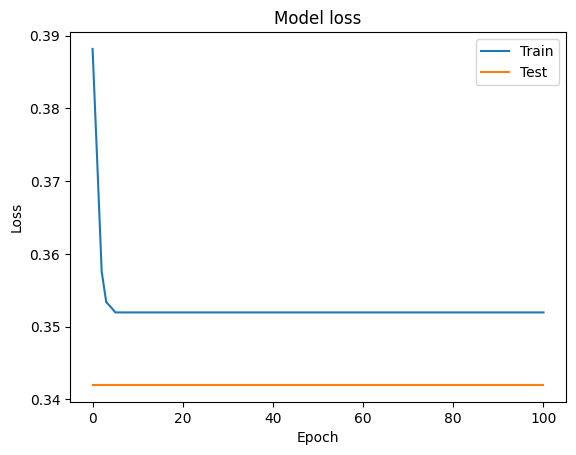

In [79]:
import matplotlib.pylab as plt

plt.plot(np.linspace(0, 100, num=100), history.history['loss'], label='Train')
plt.plot(np.linspace(0, 100, num=100), history.history['val_loss'], label='Test')
plt.legend()
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [80]:
from keras_visualizer import visualizer

visualizer(model, file_format='png', view=True)

In [81]:
model = keras.Sequential(
    [
        layers.Input(shape=(8,)),
        layers.Dense(6, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(1, activation="relu")
    ]
)

model.summary()

model.compile(
    optimizer=keras.optimizers.SGD(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)


history = model.fit(
    train_data,
    train_labels,
    batch_size=64,
    epochs=100,
    validation_data=(test_data, test_labels),
)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 6)                 54        
                                                                 
 dense_72 (Dense)            (None, 3)                 21        
                                                                 
 dense_73 (Dense)            (None, 1)                 4         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
9/9 [==============================] - 1s 25ms/step - loss: 0.5736 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.648

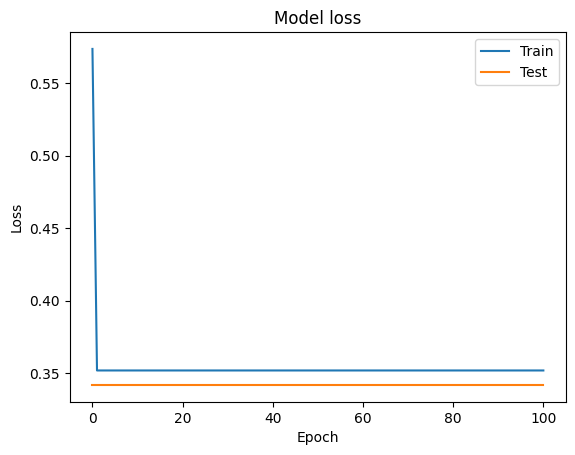

In [82]:
import matplotlib.pylab as plt

plt.plot(np.linspace(0, 100, num=100), history.history['loss'], label='Train')
plt.plot(np.linspace(0, 100, num=100), history.history['val_loss'], label='Test')
plt.legend()
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [83]:
model = keras.Sequential(
    [
        layers.Input(shape=(8,)),
        layers.Dense(6, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(1, activation="relu")
    ]
)

model.summary()

model.compile(
    optimizer=keras.optimizers.Ftrl(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)


history = model.fit(
    train_data,
    train_labels,
    batch_size=64,
    epochs=100,
    validation_data=(test_data, test_labels),
)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 6)                 54        
                                                                 
 dense_75 (Dense)            (None, 3)                 21        
                                                                 
 dense_76 (Dense)            (None, 1)                 4         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
9/9 [==============================] - 2s 112ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3520 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3420 - val_sparse_categorical_accuracy: 0.6580
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3520 - sparse_categorical_accuracy:

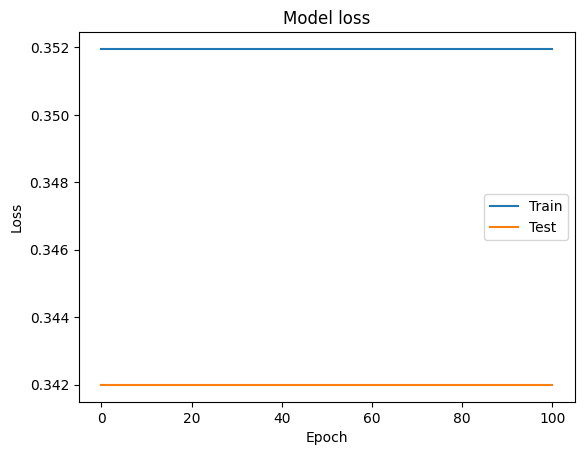

In [84]:
import matplotlib.pylab as plt

plt.plot(np.linspace(0, 100, num=100), history.history['loss'], label='Train')
plt.plot(np.linspace(0, 100, num=100), history.history['val_loss'], label='Test')
plt.legend()
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [85]:
model = keras.Sequential(
    [
        layers.Input(shape=(8,)),
        layers.Dense(6, activation="sigmoid"),
        layers.Dense(3, activation="sigmoid"),
        layers.Dense(1, activation="sigmoid")
    ]
)

model.summary()


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)


# val_data = train_data[-100:]
# val_labels = train_labels[-100:]
# train_data = train_data[:-100]
# train_labels = train_labels[:-100]

history = model.fit(
    train_data,
    train_labels,
    batch_size=64,
    epochs=100,
    validation_data=(test_data, test_labels),
)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 6)                 54        
                                                                 
 dense_78 (Dense)            (None, 3)                 21        
                                                                 
 dense_79 (Dense)            (None, 1)                 4         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
9/9 [==============================] - 2s 40ms/step - loss: 0.3857 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3897 - val_sparse_categorical_accuracy: 0.6580
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3791 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3828 - val_sparse_categorical_accuracy: 0.6580
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3727 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3754 - val_sparse_categorical_accuracy: 0.6580
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3656 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3680 - val_sparse_categorical_accuracy: 0.6580
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3584 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3604 - val_sparse_categorical_accuracy: 0.6580
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3513 - sparse_categorical_accuracy: 

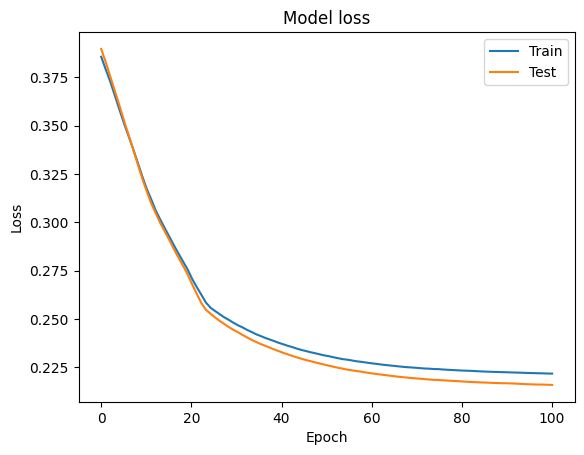

In [86]:
import matplotlib.pylab as plt

plt.plot(np.linspace(0, 100, num=100), history.history['loss'], label='Train')
plt.plot(np.linspace(0, 100, num=100), history.history['val_loss'], label='Test')
plt.legend()
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [87]:
import tensorflow as tf
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Input(shape=(8,)),
        layers.Dense(6, activation="tanh"),
        layers.Dense(3, activation="tanh"),
        layers.Dense(1, activation="tanh")
    ]
)

model.summary()


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)


# val_data = train_data[-100:]
# val_labels = train_labels[-100:]
# train_data = train_data[:-100]
# train_labels = train_labels[:-100]

history = model.fit(
    train_data,
    train_labels,
    batch_size=64,
    epochs=100,
    validation_data=(test_data, test_labels),
)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 6)                 54        
                                                                 
 dense_81 (Dense)            (None, 3)                 21        
                                                                 
 dense_82 (Dense)            (None, 1)                 4         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
9/9 [==============================] - 2s 48ms/step - loss: 0.4560 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.4755 - val_sparse_categorical_accuracy: 0.6580
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4141 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.4378 - val_sparse_categorical_accuracy: 0.6580
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3756 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.6580
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3420 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3627 - val_sparse_categorical_accuracy: 0.6580
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3156 - sparse_categorical_accuracy: 0.6480 - val_loss: 0.3382 - val_sparse_categorical_accuracy: 0.6580
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 0.3041 - sparse_categorical_accuracy: 

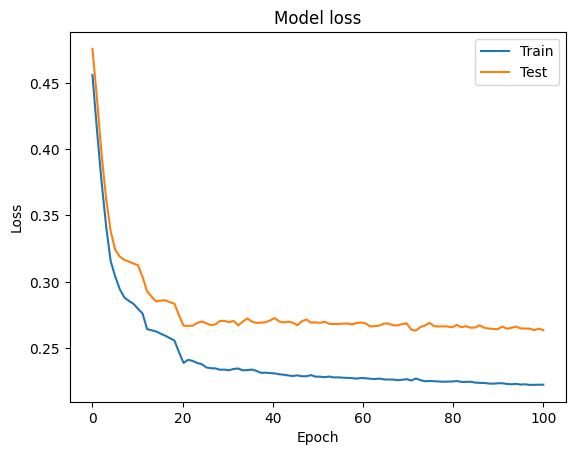

In [88]:
import matplotlib.pylab as plt

plt.plot(np.linspace(0, 100, num=100), history.history['loss'], label='Train')
plt.plot(np.linspace(0, 100, num=100), history.history['val_loss'], label='Test')
plt.legend()
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()